<a href="https://colab.research.google.com/github/zina1t/Spotify-Charts-Data-Analysis/blob/main/spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import calendar

In [315]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

In [ ]:
df = df.dropna(subset=['key'])
df.dropna(inplace=True)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
track_name_to_id = {name: index for index, name in enumerate(df['track_name'].unique())}
df['track_id'] = df['track_name'].map(track_name_to_id)
df.drop(columns=['track_name'], inplace=True)
df.info

In [ ]:
plt.figure(figsize = (10, 7))
years = df['released_year'].value_counts().sort_index()
years.plot(x = years.index, y = years, width=0.6, kind='bar')
plt.show()

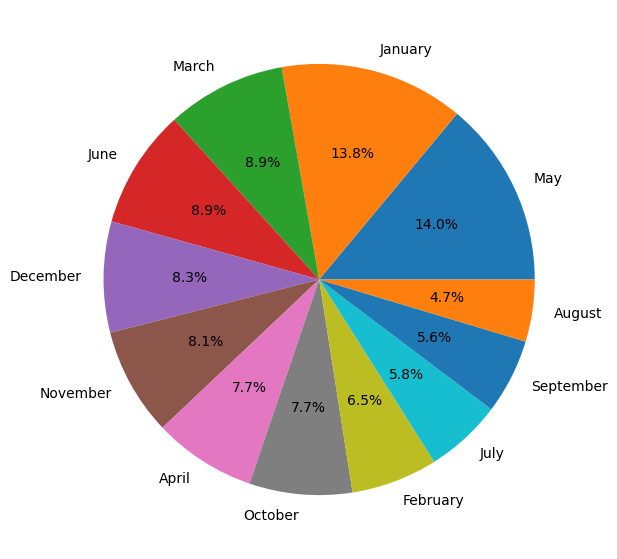

In [278]:
months = df['released_month'].value_counts()
m_names = [calendar.month_name[i] for i in months.index]

plt.figure(figsize = (10, 7))
plt.pie(months, labels=m_names, autopct='%.1f%%')
plt.show()

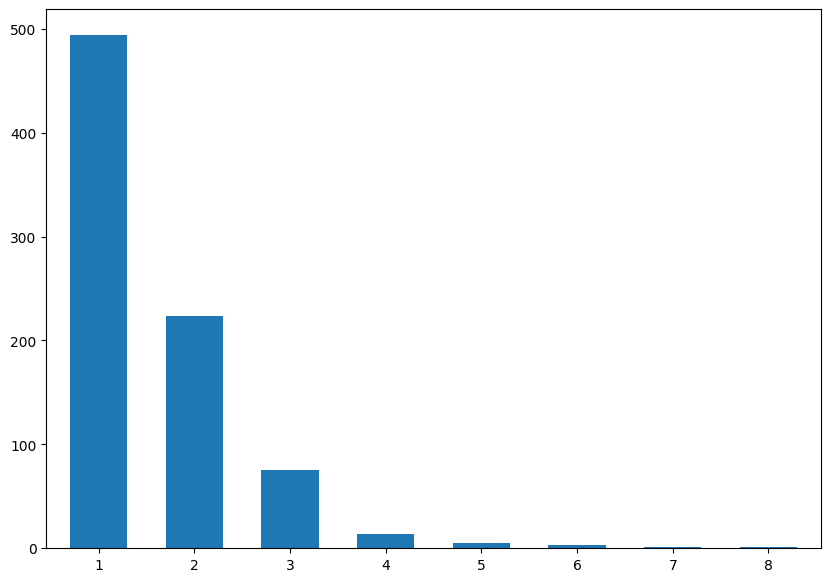

In [279]:
plt.figure(figsize = (10, 7))
artists = df['artist_count'].value_counts().sort_index()
artists.plot(x = artists.index, y = artists, width=0.6, kind='bar', rot=0)
plt.show()

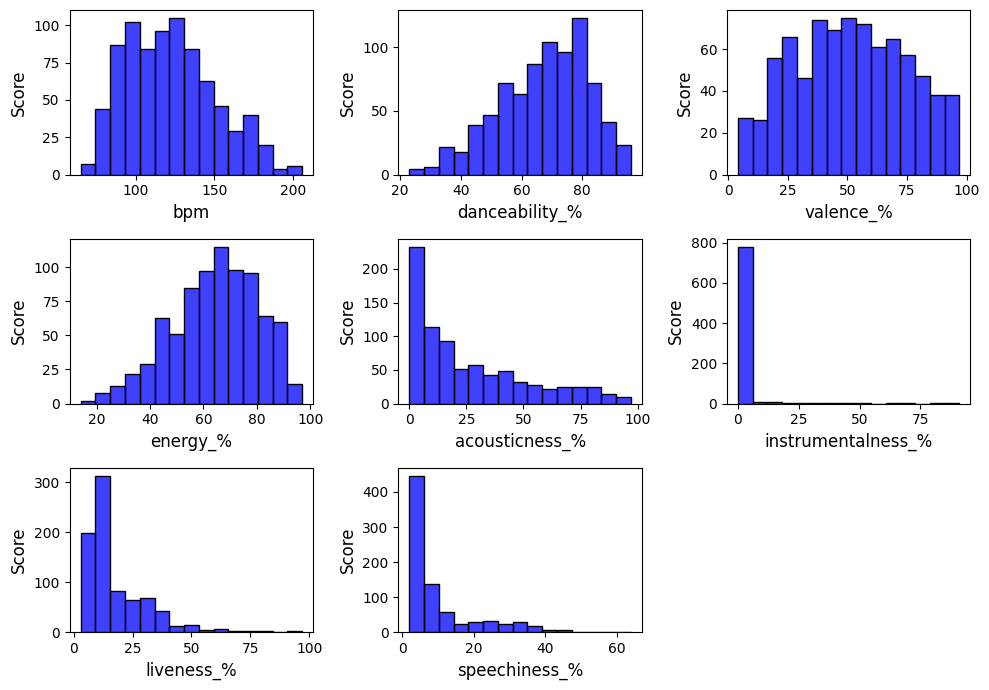

In [280]:
columns_analysis = ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
plt.figure(figsize = (10, 7))
for i, column in enumerate(columns_analysis, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=15, color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Score", fontsize=12)

plt.tight_layout()
plt.show()

In [281]:
correlation_matrix = df[columns_analysis].corr()
correlation_matrix

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
bpm,1.000000,-0.148174,0.029169,0.013363,-0.010767,-0.003407,-0.005817,0.038248
danceability_%,-0.148174,1.000000,0.389729,0.157970,-0.240454,-0.102144,-0.100579,0.201189
valence_%,0.029169,0.389729,1.000000,0.349736,-0.064072,-0.147032,0.000142,0.035704
energy_%,0.013363,0.157970,0.349736,1.000000,-0.552637,-0.051662,0.111240,-0.026880
acousticness_%,-0.010767,-0.240454,-0.064072,-0.552637,1.000000,0.046700,-0.046112,-0.017820
instrumentalness_%,-0.003407,-0.102144,-0.147032,-0.051662,0.046700,1.000000,-0.044626,-0.090994
liveness_%,-0.005817,-0.100579,0.000142,0.111240,-0.046112,-0.044626,1.000000,-0.022807
speechiness_%,0.038248,0.201189,0.035704,-0.026880,-0.017820,-0.090994,-0.022807,1.000000


<Axes: >

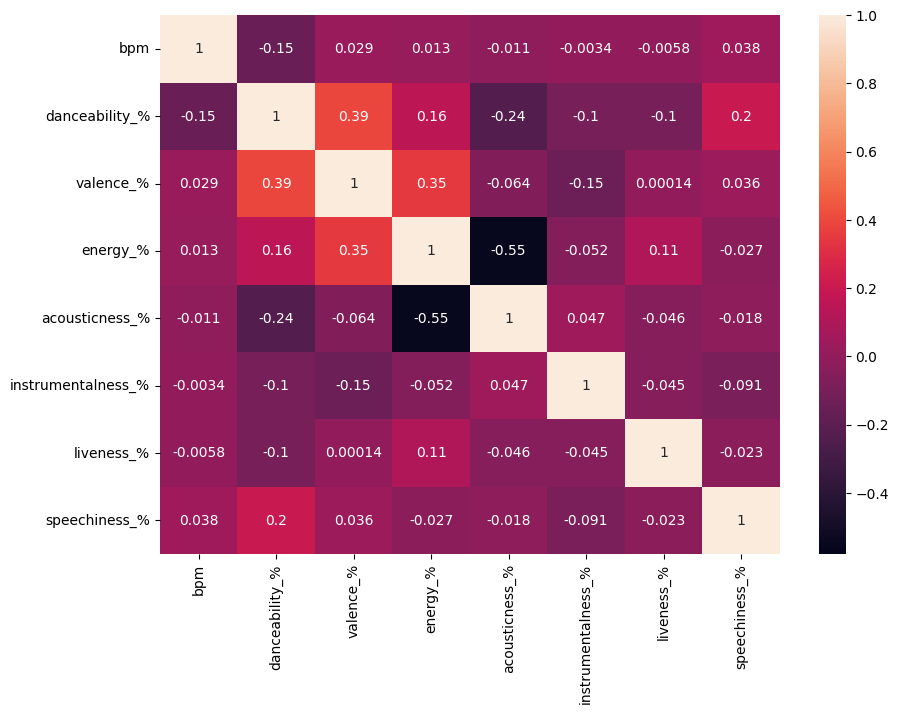

In [282]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, vmin=-0.58, vmax=1, annot=True)

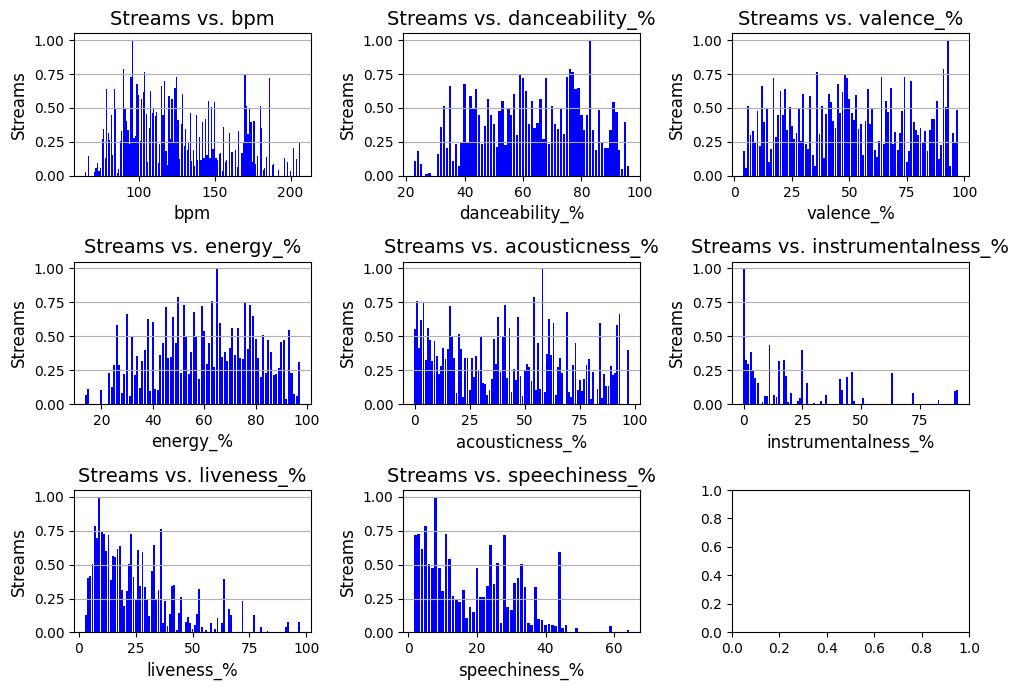

In [283]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

axes = axes.flatten()

scaler = MinMaxScaler()
df['streams'] = scaler.fit_transform(df[['streams']])

for i, column in enumerate(columns_analysis):
    plt.sca(axes[i])
    plt.bar(df[column], df['streams'], color='blue')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

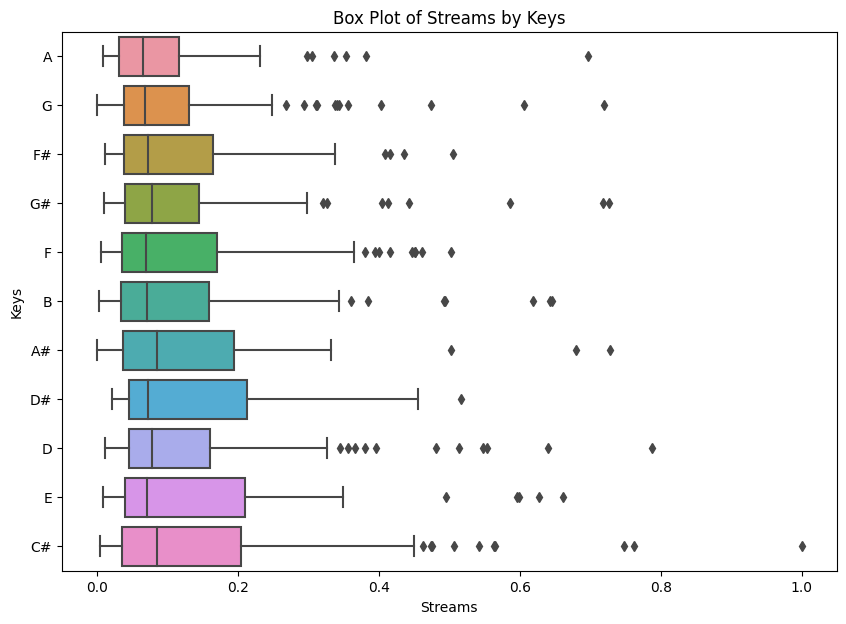

In [284]:
sorted_keys = sorted(df['key'].unique())
average_streams = df.groupby('key')['streams'].mean().sort_values().index.tolist()
plt.figure(figsize=(10,7))
sns.boxplot(x='streams', y='key', data= df, order=average_streams)
plt.xlabel('Streams')
plt.ylabel('Keys')
plt.title('Box Plot of Streams by Keys')
plt.show()

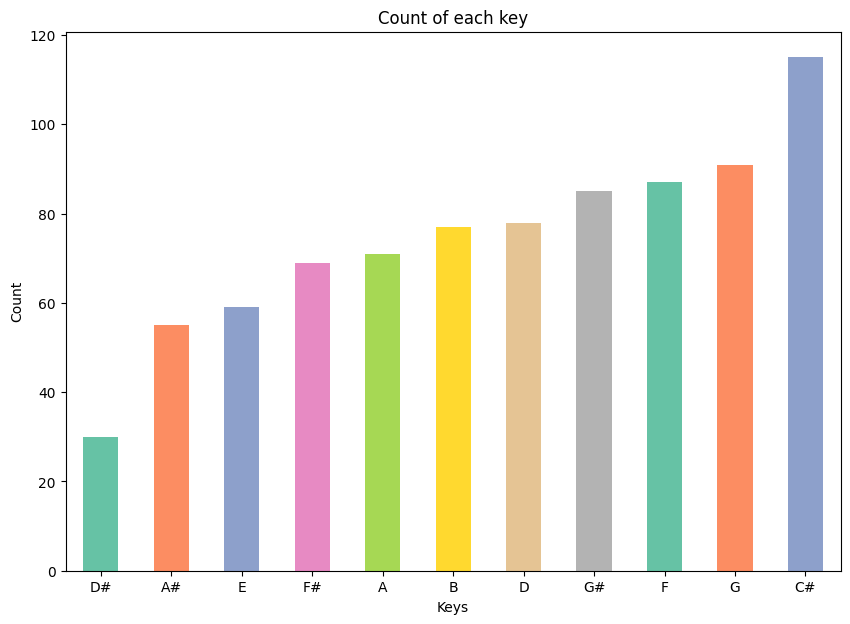

In [285]:
plt.figure(figsize=(10, 7))
key_count = df['key'].value_counts(ascending=True)
colors  = sns.color_palette("Set2", len(key_count))

key_count.plot(x = 'key', y = key_count, kind='bar', color=colors)
plt.xlabel('Keys')
plt.ylabel('Count')
plt.title('Count of each key')
plt.xticks(rotation=0)
plt.show()

In [286]:
key_df = df[['key', 'streams']].copy()
key_df = key_df.groupby('key')['streams'].agg(['mean', 'min', 'max'])
key_df = key_df.rename(columns={'mean' : 'avg_streams', 'min' : 'min_streams', 'max' : 'max_streams'})
key_df

,avg_streams,min_streams,max_streams
key,,,
A,0.102236,0.008946,0.697483
A#,0.139584,0.000000,0.728142
B,0.132506,0.003355,0.646457
C#,0.154569,0.004148,1.000000
D,0.142798,0.011011,0.788228
D#,0.140953,0.021566,0.516587
E,0.149884,0.008297,0.661246
F,0.127881,0.006338,0.501980
F#,0.118684,0.011133,0.505962


<Figure size 1000x700 with 0 Axes>

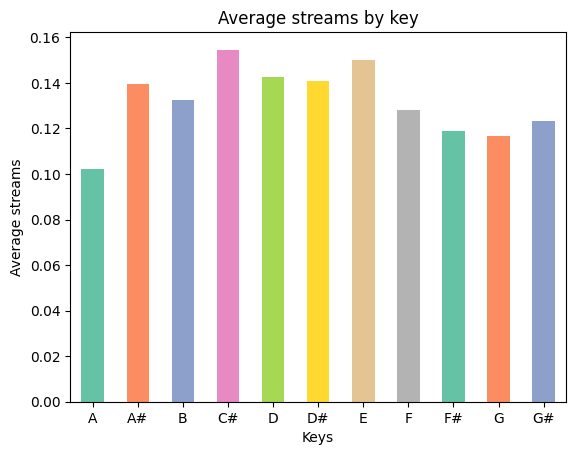

In [287]:
plt.figure(figsize=(10, 7))
key_df.plot(y ='avg_streams', color=colors, kind='bar', legend=False)
plt.xlabel('Keys')
plt.ylabel('Average streams')
plt.title('Average streams by key')
plt.xticks(rotation=0)
plt.show()

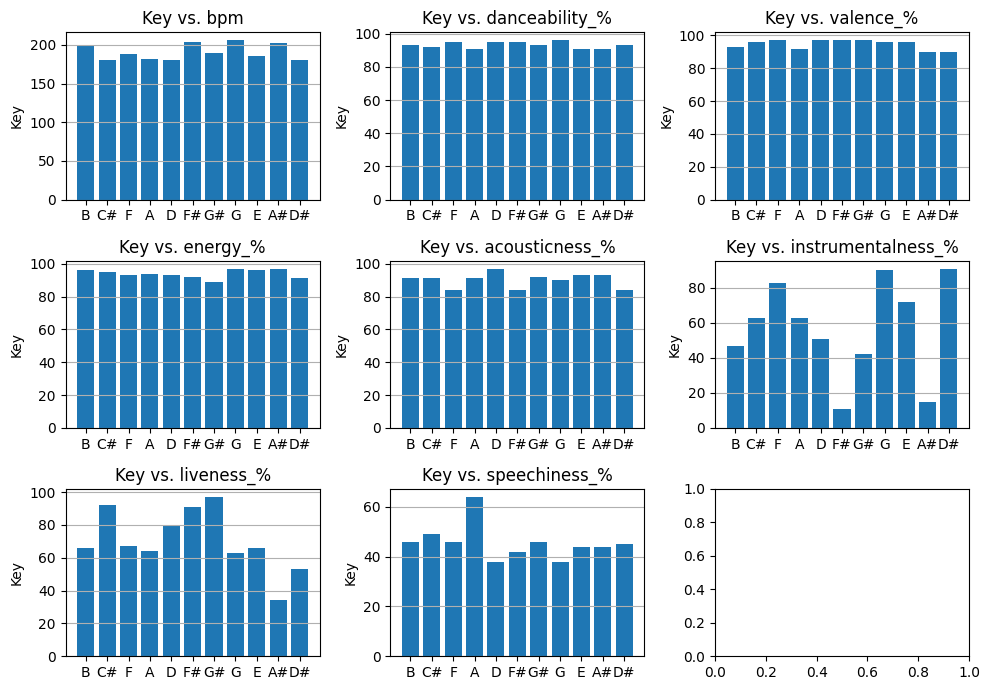

In [288]:
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

axes = axes.flatten()

scaler = MinMaxScaler()
df['streams'] = scaler.fit_transform(df[['streams']])

for i, column in enumerate(columns_analysis):
    plt.sca(axes[i])
    plt.bar(df['key'], df[column])
    plt.ylabel('Key')
    plt.title(f'Key vs. {column}')
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

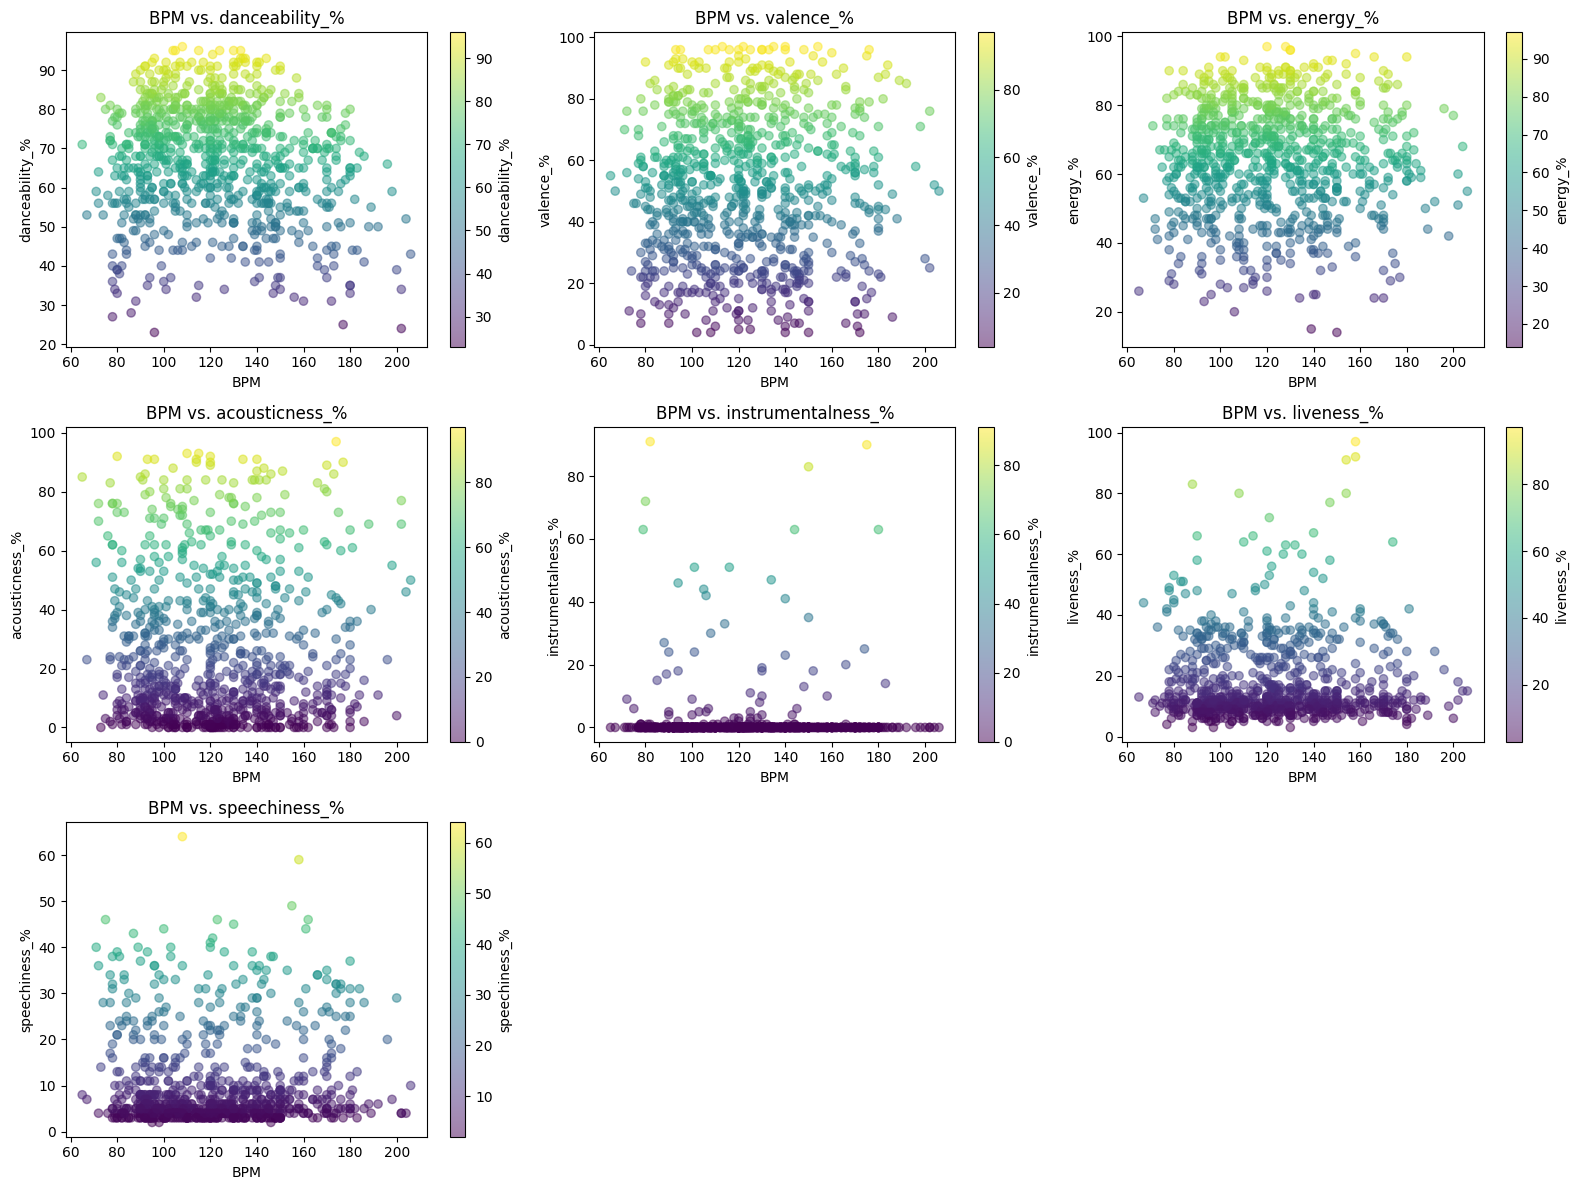

In [289]:
columns_analysis = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['bpm'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('BPM')
  plt.ylabel(column)
  plt.title(f'BPM vs. {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

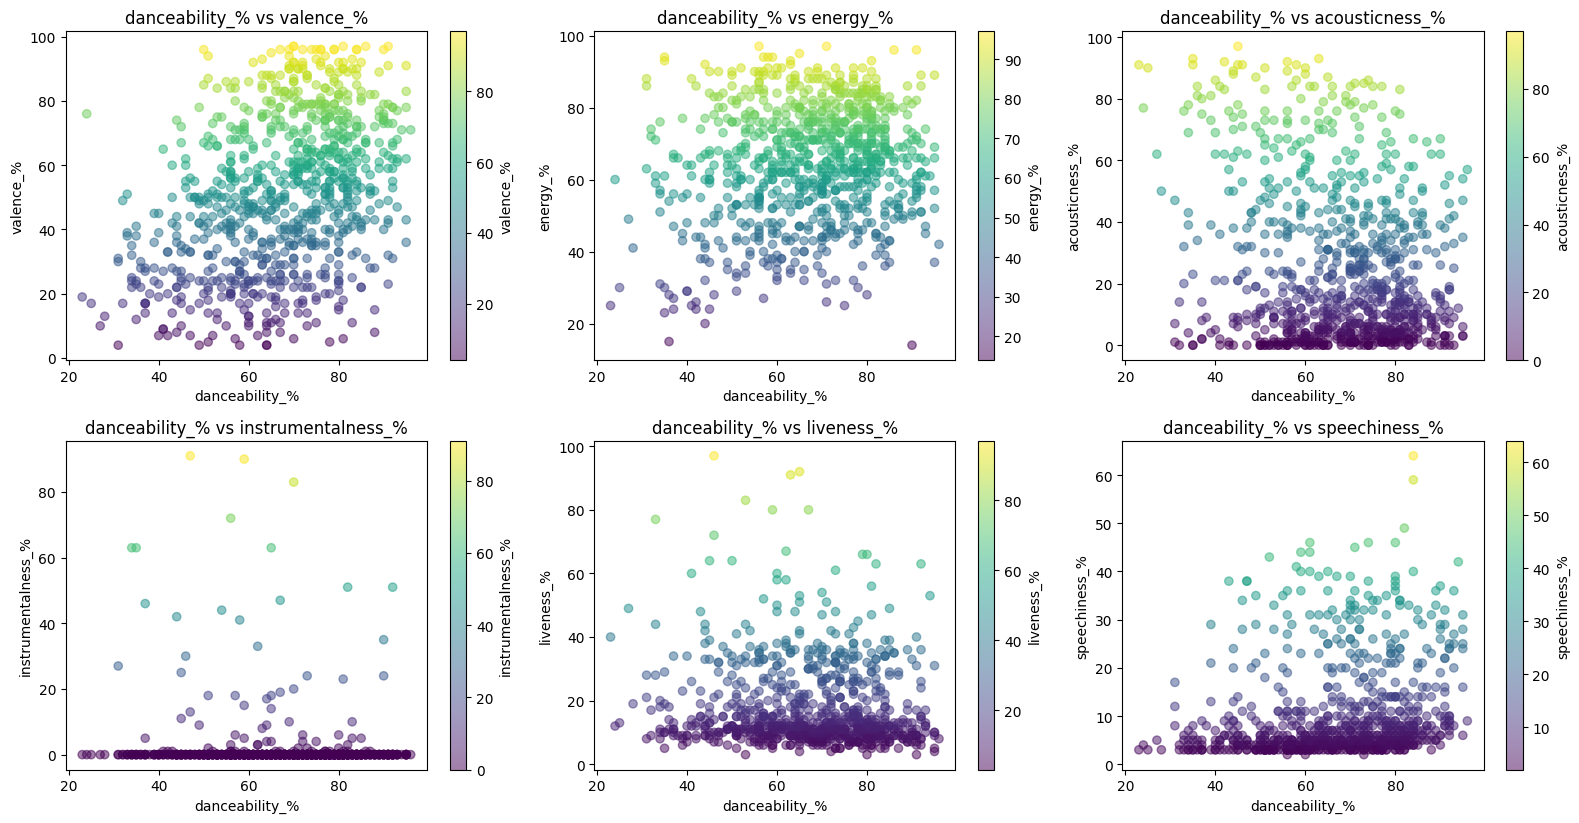

In [290]:
columns_analysis = ['valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['danceability_%'], df[column], c=df[column], cmap=colormap, alpha=0.5)
  plt.xlabel('danceability_%')
  plt.ylabel(column)
  plt.title(f'danceability_% vs {column}')
  plt.colorbar(scatter, label=column)
[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

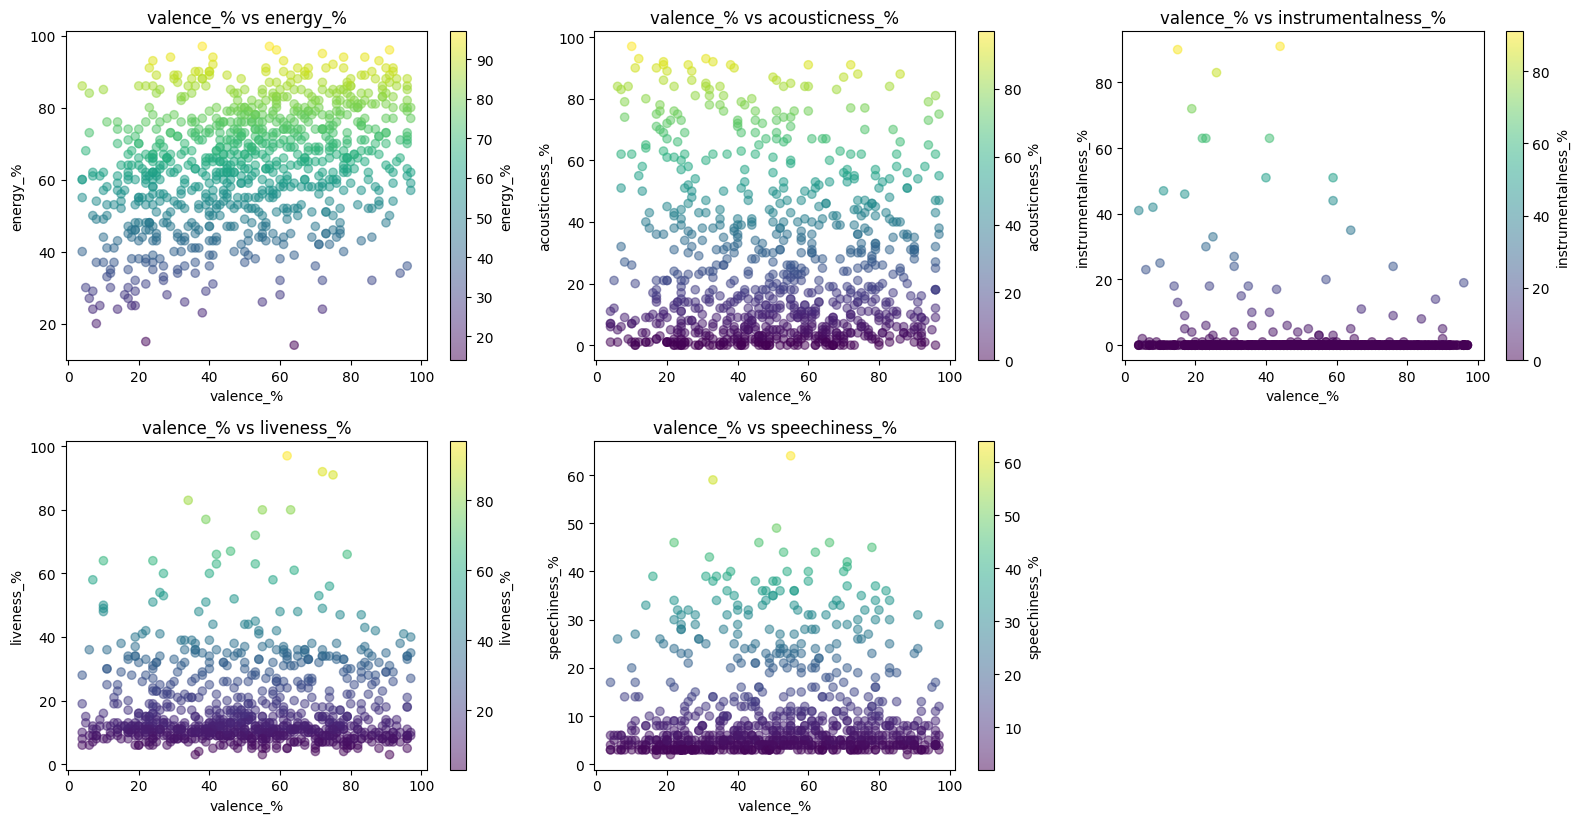

In [291]:
columns_analysis = ['energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['valence_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('valence_%')
  plt.ylabel(column)
  plt.title(f'valence_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

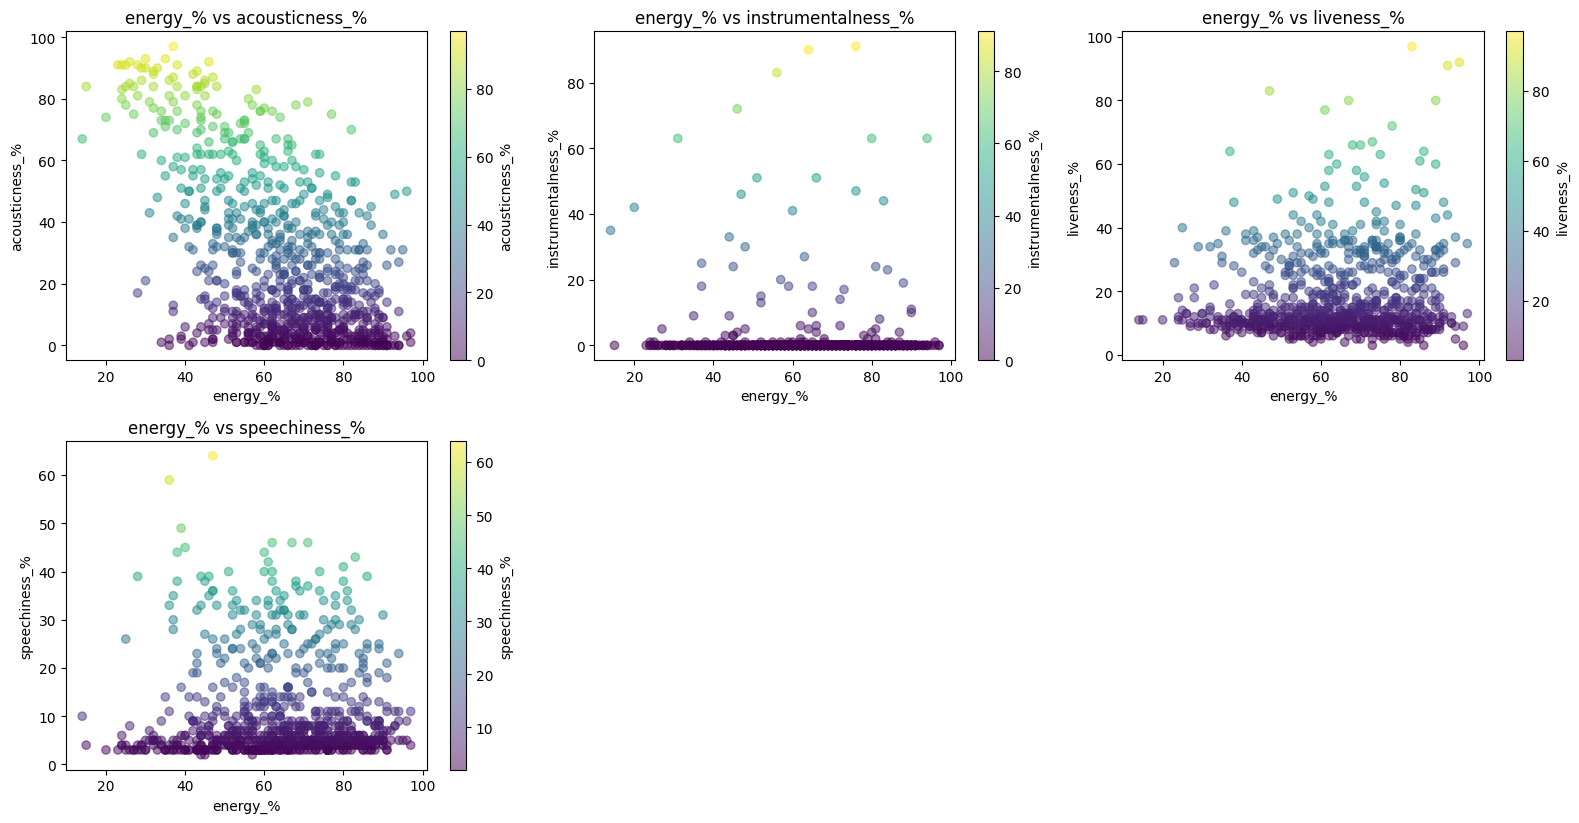

In [292]:
columns_analysis = ['acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['energy_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('energy_%')
  plt.ylabel(column)
  plt.title(f'energy_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

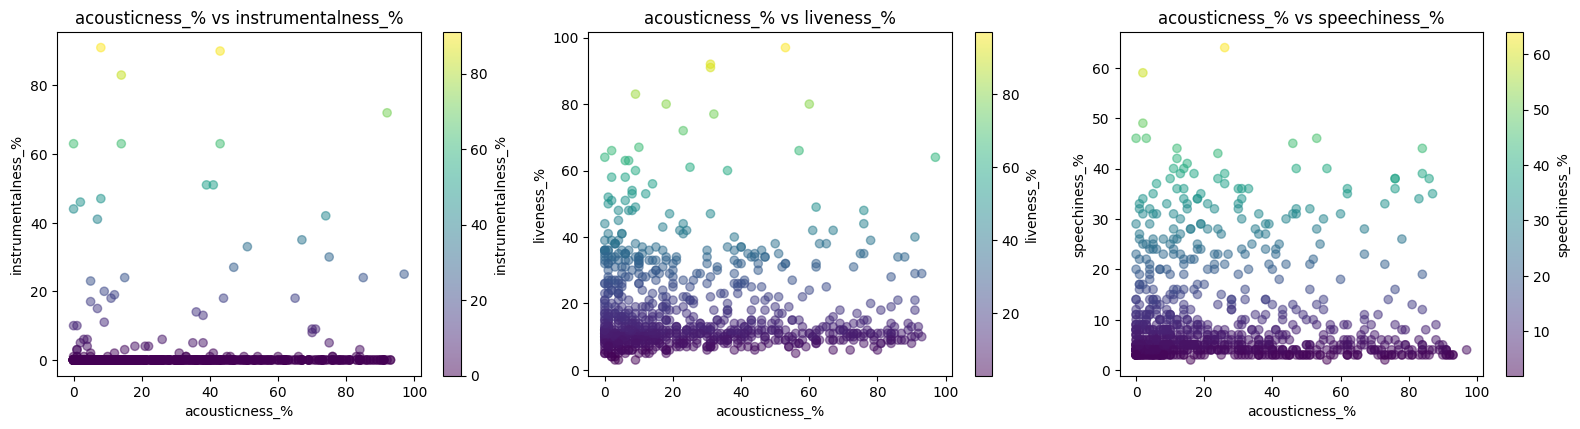

In [293]:
columns_analysis = ['instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['acousticness_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('acousticness_%')
  plt.ylabel(column)
  plt.title(f'acousticness_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

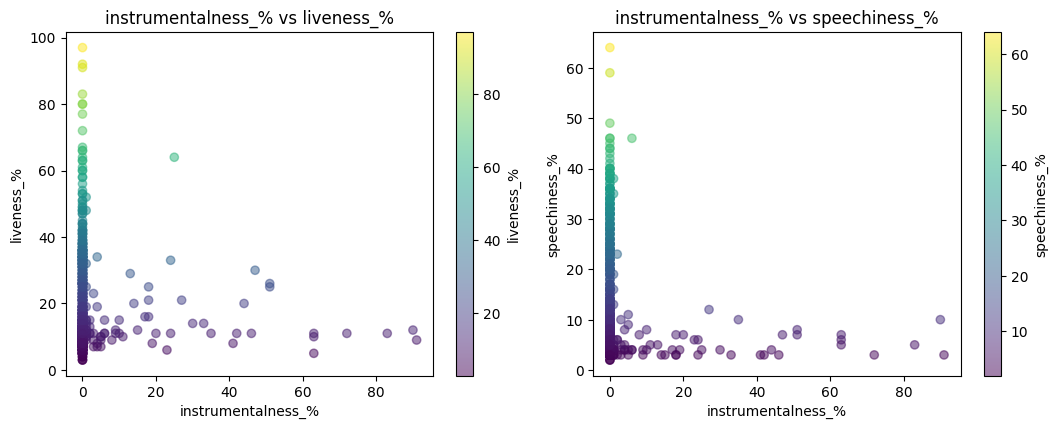

In [294]:
columns_analysis = ['liveness_%', 'speechiness_%']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))

axes = axes.flatten()

colormap = plt.colormaps['viridis']

for i, column in enumerate(columns_analysis):
  plt.sca(axes[i])
  scatter = plt.scatter(df['instrumentalness_%'], df[column], cmap=colormap, c=df[column], alpha=0.5)
  plt.xlabel('instrumentalness_%')
  plt.ylabel(column)
  plt.title(f'instrumentalness_% vs {column}')
  plt.colorbar(scatter, label=column)

[fig.delaxes(ax) for ax in axes if not ax.has_data()]
plt.tight_layout()
plt.show()

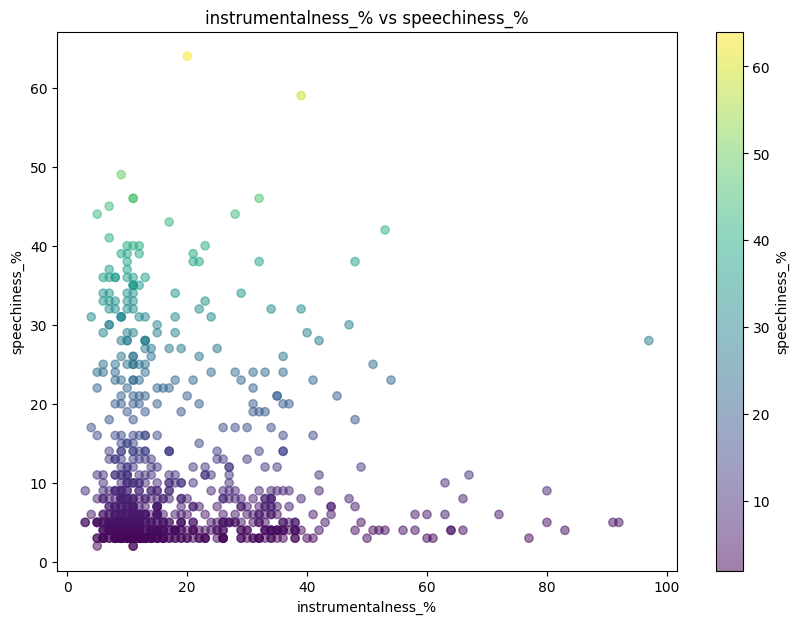

In [295]:
plt.figure(figsize=(10, 7))

colormap = plt.colormaps['viridis']

scatter = plt.scatter(df['liveness_%'], df['speechiness_%'], cmap=colormap, c=df[column], alpha=0.5)
plt.xlabel('instrumentalness_%')
plt.ylabel(column)
plt.title(f'instrumentalness_% vs {column}')
plt.colorbar(scatter, label=column)

plt.show()

In [296]:
df_features = df
df_features = pd.get_dummies(df, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features.head()

binary_columns = ['key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']
df1 = df_features
for column in binary_columns:
    df1[column] = df_features[column].astype(int)

In [ ]:
df1.drop(columns=['artist_count', 'track_id','released_year','released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts'], inplace=True)
top_10_songs = df1.nlargest(10, 'streams')
top_10_songs.describe()

In [ ]:
top_50_songs = df1.nlargest(50, 'streams')
top_50_songs.describe()

In [ ]:
top_100_songs = df1.nlargest(100, 'streams')
top_100_songs.describe()

In [ ]:
top_250_songs = df1.nlargest(250, 'streams')
top_250_songs.describe()

In [ ]:
top_500_songs = df1.nlargest(500, 'streams')
top_500_songs.describe()

In [ ]:
top_817_songs = df1.nlargest(817, 'streams')
top_817_songs.describe()

In [ ]:
nan_values = top_817_songs.isna()
print(nan_values)